# TP 1 - Reinforcement Learning (November 16rd)

Name : Alex-Răzvan Ispas

### Instructions
This assignement will be a discovery of a library for working with RL problems,   an implementation of Policy Iteration and Value Iteration algorithm and the first implementation of a sampling-based algorithm.

We used the Cliff Walking Environment (also from Sutton's book).

    Adapted from Example 6.6 (page 132) from Reinforcement Learning: An Introduction
    by Sutton and Barto:
    The board is a 4x12 matrix, with (using Numpy matrix indexing):
        [3, 0] as the start at bottom-left
        [3, 11] as the goal at bottom-right
        [3, 1..10] as the cliff at bottom-center
    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward
    and a reset to the start. An episode terminates when the agent reaches the goal.

![ChessUrl](https://gymnasium.farama.org/_images/cliff_walking.gif "Cliff Walking")

- Save this notebook in a ```.ipynb``` format and send it to cyriaque.rousselot(at)inria(dot)fr with the name ```TP1_NAME_SURNAME``` before November 23th.
- Make sure to comment your code and explain your decisions clearly. Write explanations in text if necessary 
- Answers must be short and precise and don't require thousands lines of code. 
- Generally, the code to complete is indicated with the comment ```#TO IMPLEMENT```
Good luck !


## A gentle start with Gymnasium

Have a look at the documentation of gymnasium https://gymnasium.farama.org/content/basic_usage/, of environments https://gymnasium.farama.org/api/env/ and of the Cliff Walking Environment https://gymnasium.farama.org/environments/toy_text/cliff_walking/. 


> You can use multiple render_mode in a gym environment class. For simplicity, I will ask you to render the environment in ansi mode to display it in the notebook.

**Q.1 Display the Action Space / State space of the CliffWalking environment**

In [99]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 316 µs (started: 2023-11-22 21:39:04 +01:00)


In [100]:
import numpy as np
import gymnasium as gym
from matplotlib import pyplot as plt
import time 

print("="*10 + "Load the environment"+"="*10)
env = gym.make('CliffWalking-v0', render_mode="ansi") # Initialize the environment object
observation, info = env.reset(seed=42) # Reset the environment

print("="*10 + "Visualize the environment"+"="*10)
print(env.render()) # The Cliff Walking Environment in ANSI 

## Action Space
nb_actions = 4
print("="*10 + "Action Space"+"="*10)

actions = [0,1,2,3]

print(env.action_space) # TO IMPLEMENT 

convert_action = {0:"Up",1:"Right",2:"Down",3:"Left"}

print(convert_action) # TO IMPLEMENT

## State space
nb_states = 48
print("="*10 + "State Space"+"="*10)

states = np.zeros((4,12))
states.fill(-1)

states[3,1:11] = -100 



print(env.observation_space) # TO IMPLEMENT 
print(np.array(range(48)).reshape(4,12)) # TO IMPLEMENT

env.close()

==========Load the environment==========
==========Visualize the environment==========
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


==========Action Space==========
Discrete(4)
{0: 'Up', 1: 'Right', 2: 'Down', 3: 'Left'}
==========State Space==========
Discrete(48)
[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44 45 46 47]]
time: 3.14 ms (started: 2023-11-22 21:39:04 +01:00)


### Use of a random policy

**Q.2 Implement a policy that chose an action randomly from the action space and a policy that chose always the action "go right"**

In [101]:
def RandomPolicy(state,action_space):
    return action_space.sample()
    
def GoRightPolicy(state,action_space):
    return 1

time: 248 µs (started: 2023-11-22 21:39:04 +01:00)


### Testing RandomPolicy

In [102]:
env = gym.make('CliffWalking-v0', render_mode="ansi") # Initialize the environment object
observation, info = env.reset()

print(observation, info)

print(env.render())

current_state = observation
next_action = RandomPolicy(observation,env.action_space)
print(next_action)
print(convert_action[next_action])
print(env.step(action=next_action))
print(env.render())

env.close()



36 {'prob': 1}
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


1
Right
(36, -100, False, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


time: 4.11 ms (started: 2023-11-22 21:39:04 +01:00)


### Testing GoRightPolicy

In [103]:
env = gym.make('CliffWalking-v0', render_mode="ansi") # Initialize the environment object
observation, info = env.reset()

print(observation, info)

print(env.render())

current_state = observation
next_action = GoRightPolicy(observation,env.action_space)
print(next_action)
print(convert_action[next_action])
print(env.step(action=next_action))
print(env.render())

env.close()

36 {'prob': 1}
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


1
Right
(36, -100, False, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


time: 3.52 ms (started: 2023-11-22 21:39:04 +01:00)


**Q.3 What is the meaning of the ouptut of the method ```step()``` of the environment class ?**

It is returning: 

* observation (ObsType) - which is the next where we transition to due the action of the agent

* reward (SupportsFloat) - the result for taking the respective action

* terminated/done (bool) - whether the agent reached the terminal state or not

* truncated (bool) - whether the condition for getting outside the scope of the MDP is satisfied or not.

* info (dict) - information useful for debugging (e.g. probability for transitioning, metrics etc.)


In [104]:
env = gym.make('CliffWalking-v0',render_mode="ansi")
env.reset()
print(env.render())
print(convert_action[2])
print(env.step(2))
env.close()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


Down
(36, -1, False, False, {'prob': 1.0})
time: 3.32 ms (started: 2023-11-22 21:39:04 +01:00)


**Q.4 Build a function ```transition(env,s1,Pi)``` that take in entry the environment, a state and a ```policy(state,action_space)``` function. It has to return the immediate reward ,the next state and a boolean that indicates if the next step is a terminal state.**

**Q.5 Build a function ```SimulateTrajectory(T,policy)``` that simulate the behavior of an agent that start at an initial state, chose its next states using ```policy(state,action_space)``` function and keep trace of the state visited and the rewards obtained. It stops after ```T``` steps or if it encounters a terminal state. Use this function to plot the Cumulated Discounted Reward for multiple initialisations**
>(Hint: you can use the function defined in question Q.4)

87 88


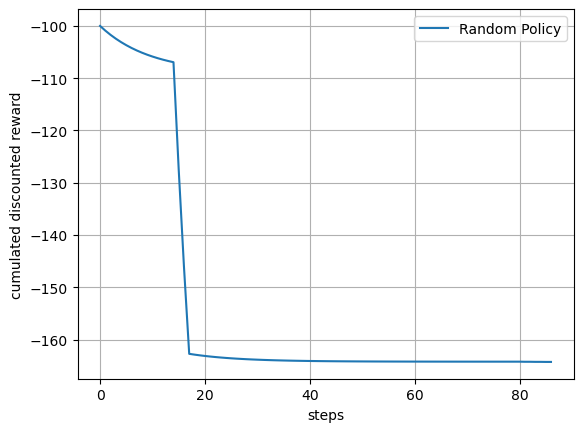

time: 68.1 ms (started: 2023-11-22 21:39:04 +01:00)


In [106]:
def SimulateTrajectory(T,policy):
    """return a vector of T successive states and a vector of T successive immediate rewards"""
    env = gym.make('CliffWalking-v0',render_mode='ansi')
    s0 = env.reset()[0]
    states = []
    rewards = []

    states.append(s0)

    for i in range(T):
        reward, next_state, terminated = transition(env,s0,policy)
        states.append(next_state)
        rewards.append(reward)
        s0 = next_state

        if terminated:
            break

    env.close()

    return states, rewards

gamma = 0.9 # discount factor 
T = int(np.log(1/(0.001*(1-gamma)))/np.log(1/gamma)) # truncation of the infinite sum 
States1,Rewards1 = SimulateTrajectory(T, RandomPolicy)

# Plot cumulative discounted reward (on a single run):
plt.figure()

print(len(Rewards1), len(States1))

plt.plot(np.cumsum(Rewards1*np.array([gamma**t for t in range(len(Rewards1))])),label="Random Policy")

plt.xlabel('steps')
plt.ylabel('cumulated discounted reward')
plt.legend()
plt.grid()
plt.show()

**Q.6 Implement the optimal policy and display a corresponding trajectory from the initial state.**

In [107]:
def Optimal_Policy(state, action_space):
    
    #If we are in the initial state, we go up
    if state == 36:
        return 0 
    
    #If we are in state 35, we go down
    if state == 35:
        return 2 
    
    #Otherwise, we go right all the time
    return 1

time: 393 µs (started: 2023-11-22 21:39:04 +01:00)


13 14


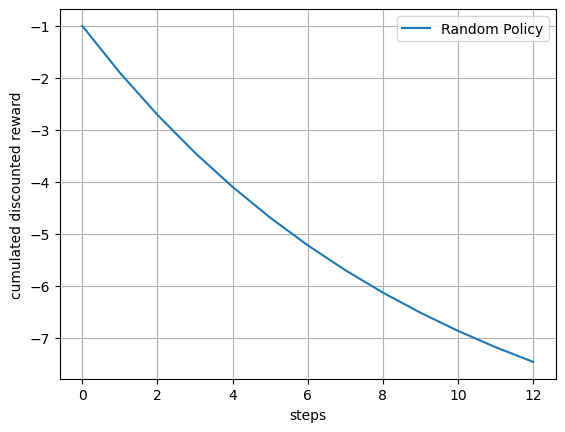

time: 70.1 ms (started: 2023-11-22 21:39:04 +01:00)


In [108]:
States1,Rewards1 = SimulateTrajectory(T, Optimal_Policy)

# Plot cumulative discounted reward (on a single run):
plt.figure()

print(len(Rewards1), len(States1))

plt.plot(np.cumsum(Rewards1*np.array([gamma**t for t in range(len(Rewards1))])),label="Random Policy")

plt.xlabel('steps')
plt.ylabel('cumulated discounted reward')
plt.legend()
plt.grid()
plt.show()

# Dynamic Programming

In order to use our dynamic programming algorithms, we need to know the parameters of the MDP. 
Here we know the reward and transition model. 

**Q.7 Fill the reward array ```r[s,a]```, the transition array ```p[s,a,s']``` and the terminal array ```T[s]``` that return a boolean if the state is terminal.**


> Hint : You can look at https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py

In [109]:
# Can be useful 
def number_to_grid(x): # Convert a state number into its coordinates on the grid.
    return(np.unravel_index(np.array(x),shape=(4,12)))

def grid_to_number(x):
    return(np.ravel_multi_index(x,(4,12)))


# MDP parameters
nb_states = 48
nb_actions = 4


time: 340 µs (started: 2023-11-22 21:39:04 +01:00)


### Filling the arrays

In [110]:
P = np.zeros((nb_states,nb_actions,nb_states)) 
r = np.zeros((nb_states, nb_actions))
T = 48*[False]
T[47] = True # The terminal state is state 47

for s in range(nb_states):
    for a in range(nb_actions):
        for prob, next_state, reward, done in env.P[s][a]: 
            P[s][a][next_state] = prob  # transition probability
            r[s][a] = reward # reward


time: 917 µs (started: 2023-11-22 21:39:04 +01:00)


In [111]:
def sample_next_state(P,s,a): # sampling method for next state given current state and action
    return np.random.choice(range(nb_states), 1, p=P[s,a])[0]

time: 240 µs (started: 2023-11-22 21:39:04 +01:00)


### Policy Iteration

In this section, we will consider deterministic policies. A deterministic policy  is represented as a vector pi[s] with s a state. 

In [112]:
example_pi =  np.random.choice([0,1,2,3], nb_states)  # An example of random deterministic policy

time: 259 µs (started: 2023-11-22 21:39:04 +01:00)


In [113]:
state = 13
print(f"The action from state {state} is {example_pi[state]}")

The action from state 13 is 2
time: 251 µs (started: 2023-11-22 21:39:04 +01:00)


**Q.8 Using the Bellman equations, build a function for evaluating the state-value function $V_\pi$ of a policy $\pi$ iteratively. We consider convergence with $\epsilon = 0.01$ or if we performed a maximum of 10000 iterations.**
> Hint : you can look at Sutton & Barto , Reinforcement Learning, An introduction, chapter 4

In [114]:
epsilon = 0.01
max_iter = 10000
def policy_evaluation(policy, epsilon, gamma, max_iter):
    V = np.zeros(nb_states) # intialize Values to 0's

    for i in range(max_iter):
        delta = 0
        for s in range(nb_states):
            if not T[s]: # we update only non terminal states
                v = V[s]
                new_V =0 
                for s_prime in range(nb_states): # the Bellman equation for state s
                    new_V += P[s][policy[s]][s_prime] * (r[s][policy[s]] + gamma * V[s_prime])

                V[s] = new_V
                delta = max(delta, abs(v - V[s])) # compute the max difference between old and new values
        if delta < epsilon: # if the difference is small enough, we stop because we converged
            break
    
    return V

time: 517 µs (started: 2023-11-22 21:39:04 +01:00)


**Q.9 Build a policy improvement function**

In [115]:
def policy_improve(V, policy):

    
    for s in range(nb_states): 
        if not T[s]:
            q = np.zeros(nb_actions) # initialize q values to 0's
            for a in range(nb_actions):  
                for s_prime in range(nb_states):
                    q[a] += P[s][a][s_prime] * (r[s][a] + gamma * V[s_prime]) # compute q values for each action of state s

            policy[s] = np.argmax(q) # update the policy for state s

    return policy
    

time: 370 µs (started: 2023-11-22 21:39:04 +01:00)


**Q.10 Using the two preceding functions, build the Policy Iteration algorithm**

In [116]:
import copy

time: 130 µs (started: 2023-11-22 21:39:04 +01:00)


In [117]:
def policy_iteration(epsilon,gamma,max_iter):
    
    policy = np.random.choice([0,1,2,3], nb_states)  


    for i in range(max_iter):
        V = policy_evaluation(policy, epsilon, gamma, max_iter) # evaluate the policy

        new_policy = policy_improve(V, copy.deepcopy(policy)) # improve the policy

        if (new_policy == policy).all(): # if the policy didn't change, we converged
            break

        policy = new_policy

    V = policy_evaluation(policy, epsilon, gamma, max_iter)

    return policy, V

time: 385 µs (started: 2023-11-22 21:39:04 +01:00)


In [118]:
epsilon = 0.01
gamma = 0.9
max_iter = 10000
policy, V = policy_iteration(epsilon, gamma, max_iter)
print(policy.reshape(4,12))

[[1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 1 0]]
time: 1 s (started: 2023-11-22 21:39:04 +01:00)


**Q.11 Test your obtained policy and compare it against random policies. Is it optimal ?** 

I will create a separate Policy and Transition function 

In [119]:
def Optimal_Iterative_Policy(policy, s):

    a = policy[s]
    return a

time: 196 µs (started: 2023-11-22 21:39:05 +01:00)


In [120]:
def transition2(env,s1,Pi):

    next_action = Pi[s1]
    next_state, reward, terminated, truncated, info = env.step(action=next_action)

    return reward, next_state, terminated


time: 270 µs (started: 2023-11-22 21:39:05 +01:00)


In [121]:
def SimulateTrajectory2(T,policy):
    """return a vector of T successive states and a vector of T successive immediate rewards"""

    env = gym.make('CliffWalking-v0',render_mode='ansi')
    s0 = env.reset()[0]
    states = []
    rewards = []

    states.append(s0)

    for i in range(T):
        reward, next_state, terminated = transition2(env,s0,policy)
        states.append(next_state)
        rewards.append(reward)
        s0 = next_state

        if terminated:
            break

    env.close()

    return states, rewards

time: 402 µs (started: 2023-11-22 21:39:05 +01:00)


[[1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 1 0]]


Text(0.5, 0.98, 'Cumulative discounted reward for the optimal policy of policy iteration and the random policy')

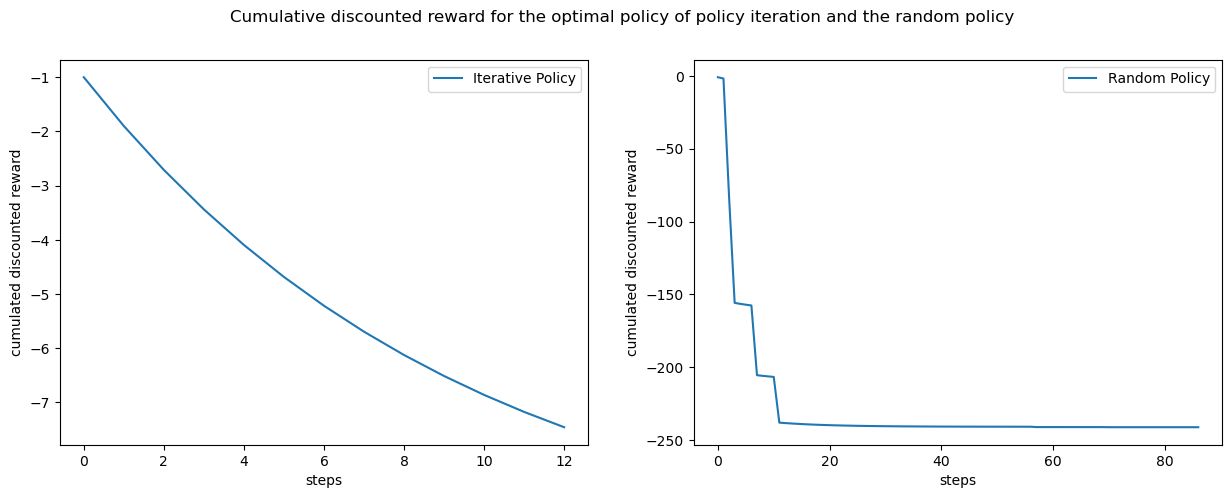

time: 152 ms (started: 2023-11-22 21:39:05 +01:00)


In [122]:
gamma = 0.9 # discount factor 
T = int(np.log(1/(0.001*(1-gamma)))/np.log(1/gamma)) # truncation of the infinite sum 

States1,Rewards1 = SimulateTrajectory2(T, policy)
States2, Rewards2 = SimulateTrajectory(T, RandomPolicy)

print(policy.reshape(4,12))

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(np.cumsum(Rewards1*np.array([gamma**t for t in range(len(Rewards1))])),label="Iterative Policy")
ax[1].plot(np.cumsum(Rewards2*np.array([gamma**t for t in range(len(Rewards2))])),label="Random Policy")

ax[0].set_xlabel('steps')
ax[0].set_ylabel('cumulated discounted reward')
ax[1].set_xlabel('steps')
ax[1].set_ylabel('cumulated discounted reward')

ax[0].legend()
ax[1].legend()

plt.suptitle("Cumulative discounted reward for the optimal policy of policy iteration and the random policy")


<b> Answer <b>: the solution is optimal and it can be noticed from the cummulative reward as well as the policy matrix that it has the same result as the optimal policy

### Value Iteration

**Q.12 Similarly to the Policy Iteration algorithm, build the Value Iteration Algorithm and test it.**

In [123]:
def value_iteration(epsilon,gamma,max_iter):
    
    V = np.zeros(nb_states)
    policy = np.zeros(nb_states)

    for i in range(max_iter):
        delta = 0
        
        for s in range(nb_states): 
            if not T[s]: # we update only non terminal states
                v = V[s]
                q = np.zeros(nb_actions)
                for a in range(nb_actions): 
                    for s_prime in range(nb_states):
                        q[a] += P[s][a][s_prime] * (r[s][a] + gamma * V[s_prime]) # compute q values for each action of state s

                V[s] = np.max(q) # update the value of state s
                policy[s] = np.argmax(q) # update the policy for state s

                delta = max(delta, abs(v - V[s])) # compute the max difference between old and new values
        if delta < epsilon: # if the difference is small enough, we stop because we converged
            print(f"Out at iteration {i}")
            break
    
    return policy, V

time: 606 µs (started: 2023-11-22 21:39:05 +01:00)


In [124]:
T = 48*[False]
T[47] = True
policy, V = value_iteration(epsilon, gamma, max_iter)

Out at iteration 14
time: 82.2 ms (started: 2023-11-22 21:39:05 +01:00)


### Visualising values as well as the learned policy

In [125]:
V.reshape(4,12)

array([[-7.71232075, -7.45813417, -7.17570464, -6.86189404, -6.5132156 ,
        -6.12579511, -5.6953279 , -5.217031  , -4.68559   , -4.0951    ,
        -3.439     , -2.71      ],
       [-7.45813417, -7.17570464, -6.86189404, -6.5132156 , -6.12579511,
        -5.6953279 , -5.217031  , -4.68559   , -4.0951    , -3.439     ,
        -2.71      , -1.9       ],
       [-7.17570464, -6.86189404, -6.5132156 , -6.12579511, -5.6953279 ,
        -5.217031  , -4.68559   , -4.0951    , -3.439     , -2.71      ,
        -1.9       , -1.        ],
       [-7.45813417, -7.17570464, -6.86189404, -6.5132156 , -6.12579511,
        -5.6953279 , -5.217031  , -4.68559   , -4.0951    , -3.439     ,
        -1.        ,  0.        ]])

time: 1.52 ms (started: 2023-11-22 21:39:05 +01:00)


In [126]:
policy.reshape(4,12)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

time: 1.38 ms (started: 2023-11-22 21:39:05 +01:00)


### Testing Value Iteration

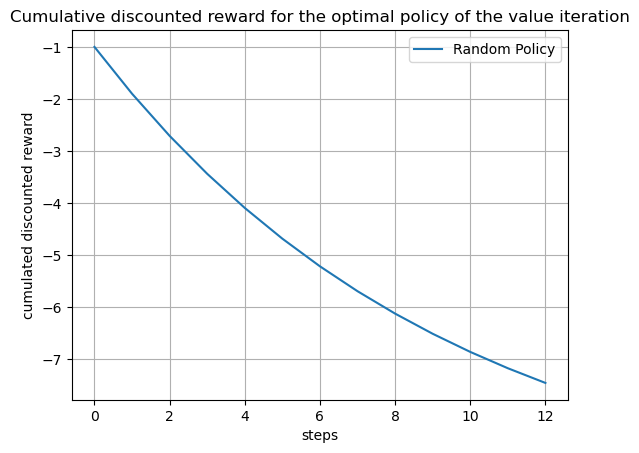

time: 84.4 ms (started: 2023-11-22 21:39:05 +01:00)


In [127]:
gamma = 0.9 # discount factor 
T = int(np.log(1/(0.001*(1-gamma)))/np.log(1/gamma)) # truncation of the infinite sum 

States1,Rewards1 = SimulateTrajectory2(T, policy)

plt.plot(np.cumsum(Rewards1*np.array([gamma**t for t in range(len(Rewards1))])),label="Random Policy")

plt.title("Cumulative discounted reward for the optimal policy of the value iteration")
plt.xlabel('steps')
plt.ylabel('cumulated discounted reward')
plt.legend()
plt.grid()
plt.show()

# Our first sampling algorithm

Now we don't have access to the Reward and Transitions table anymore ! We will have to explore to build our knowledge of an estimation of the action-value Q(s,a) along the way.

**Q.13 Read the pseudo-code for the Monte Carlo Exploring Starts algorithms. Describe briefly how the algorithm allows in theory to get a good policy.**
![Alt text](image.png)

**Q.14 Why can this algorithm be not efficient ?**



* If we have a huge state-action space, it will take a lot of time to explore all of them (and subsequently to take into account the optimal policy)

* If it converges to a suboptimal deterministic policy, it may stop exploring other better policies

* The returns can have high variance, which can make the learning process noisy and slow

**Q.15  Implement a Monte Carlo Exploring Starts algorithm.**

We will store action-value information in a table q[s,a] that will be updated at each episode. 

You will need :
- To store ```pi```, ```q[s,a]``` as tables and ```Returns(s,a)``` as a list of cumulative discounted rewards
- To reset the environment for each episode. 
- To use the ```step()``` method to act on the environment 
- To update your knowledge of q on the trajectory of the episode.
- To update the current policy given the update of q.


<b> Problem: </b> We cannot set the initial state with the class provided. Therefore, we will extend the original class and manually add this feature.

In [128]:
from gymnasium.envs.toy_text.cliffwalking import CliffWalkingEnv

#alright, I realised later on that you can actually access it from env.s. I thought that the parameter is "protected" and that I need to inherit the class 
#I am not changing the code anymore (#the_engineer_way)
class CustomCliffWalkingEnv(CliffWalkingEnv):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.initial_state = None  

    def reset(self, initial_state=None):
        if initial_state is not None:  # If the initial state is specified, we start from this state
            self.initial_state = initial_state 
            self.s = initial_state
        else:  # otherwise, we start from the initial state of the environment
            self.s = 36 
            self.initial_state = 36

        self.lastaction = None
        return self.s

    def set_initial_state(self, initial_state):
        self.initial_state = initial_state


time: 549 µs (started: 2023-11-22 21:39:05 +01:00)


In [129]:
class MCExploringStartsAgent:
    def __init__(self, state_space, action_space, gamma=0.99):
        self.state_space = state_space 
        self.action_space = action_space
        self.gamma = gamma

        # initialize the Q values as a matrix of zeros
        self.Q = np.zeros((state_space, action_space))

        # it is much easer to work with key value pairs than with a matrix
        # initialize the returns as an empty list for each state action pair
        self.returns = {(s, a): [] for s in range(state_space) for a in range(action_space)} 
        

        # initialize the policy as a random policy
        self.policy = np.random.choice(action_space, state_space)

    def choose_action(self, state):
        return self.policy[state]

    def generate_episode(self, env, T=100):

        episode = [] 

        state = np.random.choice(self.state_space)  # choosing s0 and a0 arbitrary
        action = np.random.choice(self.action_space)
        env.reset(state)
        next_state, reward, done, truncated, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state

        for _ in range (T): # generate T steps of the episode
            action = self.choose_action(state) 
            next_state, reward, done, truncated,info = env.step(action)
            episode.append((state, action, reward))
            state = next_state

            if done:
                break

        return episode

    def update_policy(self, episode):
        G = 0

        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = self.gamma * G + reward

            if not (state, action) in [(x[0], x[1]) for x in episode[:t]]: # if the state action pair is not in the episode earlier in the sequence
                self.returns[(state, action)].append(G) # append the cummulatative reward to the list of returns for this state action pair
                self.Q[state, action] = np.mean(self.returns[(state, action)]) # update the Q value for this state action pair by taking the mean of the returns
                self.policy[state] = np.argmax(self.Q[state, :]) # update the policy for this state by taking the action with the highest Q value




env = CustomCliffWalkingEnv(render_mode="ansi")
state_space = env.observation_space.n
action_space = env.action_space.n
agent = MCExploringStartsAgent(state_space, action_space)

# Monte Carlo ES training loop
num_episodes = 10000
T = 100
for _ in range(num_episodes): # generate N episodes 
    print(f"Episode {_}")
    episode = agent.generate_episode(env, T) # generate an episode
    agent.update_policy(episode) # update the policy based on the sampled steps 

Episode 0
Episode 1
Episode 2
Episode 3
Episode 4
Episode 5
Episode 6
Episode 7
Episode 8
Episode 9
Episode 10
Episode 11
Episode 12
Episode 13
Episode 14
Episode 15
Episode 16
Episode 17
Episode 18
Episode 19
Episode 20
Episode 21
Episode 22
Episode 23
Episode 24
Episode 25
Episode 26
Episode 27
Episode 28
Episode 29
Episode 30
Episode 31
Episode 32
Episode 33
Episode 34
Episode 35
Episode 36
Episode 37
Episode 38
Episode 39
Episode 40
Episode 41
Episode 42
Episode 43
Episode 44
Episode 45
Episode 46
Episode 47
Episode 48
Episode 49
Episode 50
Episode 51
Episode 52
Episode 53
Episode 54
Episode 55
Episode 56
Episode 57
Episode 58
Episode 59
Episode 60
Episode 61
Episode 62
Episode 63
Episode 64
Episode 65
Episode 66
Episode 67
Episode 68
Episode 69
Episode 70
Episode 71
Episode 72
Episode 73
Episode 74
Episode 75
Episode 76
Episode 77
Episode 78
Episode 79
Episode 80
Episode 81
Episode 82
Episode 83
Episode 84
Episode 85
Episode 86
Episode 87
Episode 88
Episode 89
Episode 90
Episode 9

**Q.16 Visualize the obtained policy after training over some iterations and conclude**

In [130]:
print(agent.policy.reshape(4,12))

[[1 2 3 2 1 1 1 1 1 1 1 2]
 [2 1 2 1 0 0 2 1 0 1 1 2]
 [1 1 1 1 1 1 1 0 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 1 2]]
time: 303 µs (started: 2023-11-22 21:39:16 +01:00)


## Conclusion:

In this notebook we had a gentle introduction in gymnasium and we explored three algorithms:

* <b> Policy Iteration </b> proves to be a robust method in environments with small state spaces as it can rapidly converge, but it needs to have prior knowledge about the rewards and transitions of the whole environment. In this algorithm, the value function for a given policy is calculated until it converges. The improvement step updates the policy by performing greedy with respect to the current value function.

* Unlike <b> policy iteration </b>, <b> value iteration</b> combines the policy evaluation and policy improvement steps in a single step. Based on the value function, it improves the policy at each step and it finishes when the value function converges. It still depends on the rewards and transitions

* <b> Monte Carlo Exploring Starts </b> is averaging the returns of the sampled estimated value function and it is useful when we do not have access to the rewards and transitions of the environment. It explores the environment at different starting states and it averages returns of each (state, action) pair in order to produce the estunated value function.  However, the sampled returns can produce high variance which can impact the consistency of the policy update. At the same time, it can take time to explore all (state,action) possibilities and we might not find the optimal policy